# Damped and Forced Pendulums
## Lecture 8

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ipywidgets import interactive, fixed

## The Motion of a Pendulum

A common example of mechanical system that exhibits oscillatory motion is the simple pendulum.  A simple pendulum is an idealized system consisting of a particle or bob of mass $m$ attached to the lower end of rigid rod of length $L$ and negligble mass; the upper end of the rod pivots without friction. If the bob is pulled to one side from its equilibrium position and released, the pendulum swings in a vertical plane.

Because the bob is constrained to move along the arc of a circle of radius $L$ about the center, the bob’s position is specified by its arc length or by the angle $\theta$.

The linear velocity and acceleration of the bob as measured along the arc are given by

$$\begin{align}
v &= L \frac{d\theta}{dt}\\
a &= L \frac{d^2\theta}{dt^2}
\end{align}
$$

In the absence of friction, two forces act on the bob: the force $mg$ vertically downward and theforce of the rod which is directed inward to the center if $|\theta| < \pi/2$. 

Note that the effect of the rigid rod is to constrain the motion of the bob along the arc. We can see that the component of $mg$ along the arc is $m g \sin \theta$ in the direction of decreasing $\theta$. Hence, the equation of motion can be written as

$$m L \frac{d^2\theta}{dt^2} = -m g \sin \theta$$

or

$$\frac{d^2\theta}{dt^2} = - \frac{g}{L} \sin \theta$$

This equation is an example of a nonlinear equation because $\sin\theta$ rather than $\theta$ appears. Most nonlinear equations do not have analytical solutions in terms of well-known functions, and this equation is no exception.

However, if the amplitude of the pendulum oscillations is sufficiently small, then $\sin \theta \approx \theta$, and this equation reduces to

$$\frac{d^2\theta}{dt^2} \approx - \frac{g}{L}  \theta \quad \quad (\theta \ll 1)$$

Remember that $\theta$ is measured in radians.

Part of the fun of studying physics comes from realizing that equations that appear in different contexts often are similar. An example can be seen by comparing the equation for a for a small-angle pendulum with the equation for a spring-mass system:

$$\frac{d^2 x}{dt^2} = -\frac{k}{m} x$$

If we associate $x$ with $\theta$, we see that the two equations are identical in form, and we can immediately conclude that for  $\theta \ll 1$, the period of a pendulum is given by


$$ T= 2\pi\sqrt{\frac{L}{g}}. \quad\quad\mbox{(small amplitude oscillations)}$$

One way to understand the motion of a pendulum with large oscillations is to solve the original pendulum equation of motion numerically. 

Because we know that the numerical solutions must be consistent with conservation of energy, we derive the form of the total energy here.

The potential energy can be found from the following considerations. If the rod is deflected by the angle $\theta$, then the bob is raised by the distance $h=L−L\cos\theta$. 

Hence, the potential energy of the bob in the gravitational field of the earth is 

$$U=mgh=mgL(1−\cos\theta),$$

where the zero of the potential energy corresponds to $\theta= 0$.

Because the kinetic energy of the pendulum is

$$\frac{1}{2}m v^2 = \frac{1}{2} m L^2 (d\theta/dt)^2,$$ 

the total energy $E$ of the pendulum is

$$E=\frac{1}{2}m L^2\left(\frac{d\theta}{dt}\right)^2+mgL(1−\cos\theta).$$

### Numerical Solution

We can write a program to simulate and visualize the motion of a pendulum problem, `SimplePendulumApp`. The function `SimplePendulumStepper` implements solves the dynamical equations using the Euler-Richardson algorithm.

#### Equation of motion:

\begin{align}
\frac{d}{dt} \left(\frac{d\theta}{dt}\right) &= - \frac{g}{L} \sin\theta\;, 
\end{align}

where $d\theta/dt$ is the angular velocity of the pendulum.  We will use the same approach of treating a second-order differential equation as a pair of first-order differential equations. We did the same thing when dealing with linear particle motion.

The natural frequency of the system is given by

$$\omega_0 = \sqrt{\frac{g}{L}}$$

so we can use this directly as a parameter for the dynamical motion.

In [2]:
## constants
g = 9.8
L = g / 9  # L chosen so that ω0=3
ω0 = np.sqrt(g/L)
m = 1

In the code below, we are using the variable `x` to represent the angle of the pendulum ($\theta$) and `v` to represent the angular velocity of the pendulum ($d\theta/dt$). 

This allows to use *exactly* the same numerical solver as we had for simple harmonic motion without risking introducing any new errors by changing variable names.

The only significant change is to update the line that calculates the angular acceleration: `a = - (g/L) * np.sin(x)`

In [3]:
def SimplePendulumStepper(x0=1, v0=0, dt=0.1, tmax=10):
    """
    Solve for motion of a pendulum using Euler-Richardson
    """
    
    # initialize the model
    t = 0
    x = x0
    v = v0
    
    while True:
        model = {'t': t, 'x': x, 'v': v}
        yield model # return the model state back to the caller
    
        if t > tmax:
            break
            
        # calculate acceleration (force / mass)
        a = - (g/L) * np.sin(x) 
        
        # use the Euler-Richardson algorithm to update the state of the model
        vmid = v + 1/2 * a * dt
        xmid = x + 1/2 * v * dt
        amid = - (g/L) * np.sin(xmid)
        
        v = v + amid * dt
        x = x + vmid * dt
        t = t + dt

To visualize the results, we can plot the angle $\theta$ as function of time.

In [4]:
def SimplePendulumPlotter(data):
    fig, axs = plt.subplots(3, 1, figsize=(10,6))
    
    θ0 = data.iloc[0].x
    x_analytical = θ0 * np.cos(ω0*data.t)
    v_analytical = - ω0*θ0 * np.sin(ω0*data.t)
    
    axs[0].plot(data.t, data.x, label='Numerical')
    axs[0].plot(data.t, x_analytical, label='Analytical')
    axs[0].set_ylabel("θ")
    axs[0].legend()
    
    axs[1].plot(data.t, data.v)
    axs[1].plot(data.t, v_analytical)
    axs[1].set_ylabel("dθ/dt")
    
    KE = 1/2 * m * L**2 * data.v**2
    PE = m * g * L * (1 - np.cos(data.x))
    E = KE + PE
    axs[2].plot(data.t, KE, label='KE')
    axs[2].plot(data.t, PE, label='PE')
    axs[2].plot(data.t, E, label='E')
    axs[2].set_ylabel("E (J)")
    axs[2].legend()
    
    axs[2].set_xlabel("t (s)")

In [5]:
def SimplePendulumApp(θ0=0.2, dt=0.05):
   
    # set up the model
    stepper = SimplePendulumStepper(x0=θ0, dt=dt)
    
    # iterate the model in time
    data = pd.DataFrame(stepper)
    
    # visualize the results
    SimplePendulumPlotter(data)
    
    return data

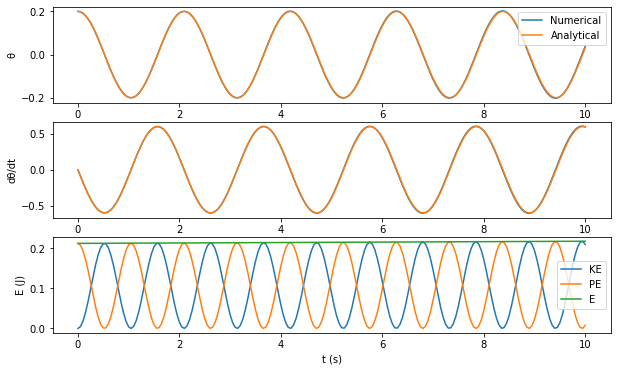

In [6]:
SimplePendulumApp(); # ";" to prevent data from being displayed

---

#### Exercise **Problem 4.5** Oscillations of a pendulum

a. Make the necessary changes so that the analytical solution for small angles also is plotted.

b. Test the program at sufficiently small amplitudes so that $\sin\theta\approx\theta$. Choose $\omega_0 \ sqrt{g/L} = 3$ and the initial conditions $\theta(t=0) = 0.2$ and $d\theta(t= 0)/dt= 0$. Determine the period numerically and compare your result to the expected analytical result for small amplitudes. Explain your method for determining the period. Estimate the error due to the small angle approximation for these initial conditions.

c. Consider larger amplitudes and make plots of $\theta(t)$ and $d\theta(t)/dt$ versus $t$ for the initial conditions $\theta(t=0) = 0.1$, $0.2$, $0.4$, $0.8$, and $1.0$ with $d\theta(t=0)/dt=0$. Choose $\Delta t$ so that the numerical algorithm generates a stable solution, that is, monitor the total energy and ensure that it does not drift from its initial value. Describe the qualitative behavior of $\theta$ and $d\theta/dt$. What is the period $T$ and the amplitude $θ_{max}$ in each case? Plot $T$ versus $\theta_{max}$ and discuss the qualitative dependence of the period on the amplitude. How do your results for $T$ compare in the linear and nonlinear cases, for example, which period is larger? Explain the relative values of $T$ in terms of the relative magnitudes of the restoring force in the two cases.

---

Analytically, a simple pendulum for small-angles with $\theta{(t=0)} = \theta_0$ and $d\theta/dt{(t=0)} = 0$ will have a solution of

$$\begin{align}
    \theta &= \theta_0 \cos (\omega_0 t) \\
    d\theta/dt &= - \omega_0 \theta_0 \sin(\omega_0 t) 
\end{align}
$$

In [7]:
interactive(SimplePendulumApp, θ0=(0.1, 1.1, 0.1), dt=(0.01, 0.3, 0.01))

interactive(children=(FloatSlider(value=0.2, description='θ0', max=1.1, min=0.1), FloatSlider(value=0.05, desc…

To conserve energy we need a time step of `dt < 0.1` so we choose `dt = 0.05`.

As the initial amplitude increases, the period of the pendulum increases relative to the analytical solution for the small-angle approximation.

To find the period, we can find the location of the peaks in the sinusoidal curve and measure the time difference between peaks.

In [8]:
def FindPendulumPeriod(data):
   
    data['max'] = data.x[(data.x.shift(1) < data.x) & (data.x.shift(-1) < data.x)]
    T = data.dropna().t.diff().mean()
    
    return T

##### *How does this work?*

In [9]:
data = SimplePendulumApp(θ0=0.2)
plt.close() # to prevent the plot from being shown

In [10]:
data.head()

,t,x,v
0,0.00,0.200000,0.000000
1,0.05,0.197765,-0.089401
2,0.10,0.191085,-0.176830
3,0.15,0.180106,-0.260342
4,0.20,0.165074,-0.338069


In [11]:
data['max'] = data.x[(data.x.shift(1) < data.x) & (data.x.shift(-1) < data.x)]

In [12]:
data = pd.DataFrame({'t': data.t,
                     'x':data.x,
                     'x.shift(1)': data.x.shift(1), 
                     'x.shift(-1)':data.x.shift(-1),
                     '>left': data.x.shift(1) < data.x,
                     '>right': data.x.shift(-1) < data.x,
                     'and': (data.x.shift(1) < data.x) & (data.x.shift(-1) < data.x),
                     'max': data.x[(data.x.shift(1) < data.x) & (data.x.shift(-1) < data.x)]})
data.iloc[40:45]

,t,x,x.shift(1),x.shift(-1),>left,>right,and,max
40,2.00,0.192919,0.182574,0.198929,True,False,False,NaN
41,2.05,0.198929,0.192919,0.200468,True,False,False,NaN
42,2.10,0.200468,0.198929,0.197502,True,True,True,0.200468
43,2.15,0.197502,0.200468,0.190097,False,True,False,NaN
44,2.20,0.190097,0.197502,0.178415,False,True,False,NaN


In [13]:
data.dropna()

,t,x,x.shift(1),x.shift(-1),>left,>right,and,max
42,2.10,0.200468,0.198929,0.197502,True,True,True,0.200468
84,4.20,0.200820,0.200003,0.197124,True,True,True,0.200820
126,6.30,0.201056,0.200964,0.196631,True,True,True,0.201056
167,8.35,0.201811,0.197909,0.201178,True,True,True,0.201811


In [14]:
data.dropna().t

42     2.10
84     4.20
126    6.30
167    8.35
Name: t, dtype: float64

In [15]:
data.dropna().t.diff()

42      NaN
84     2.10
126    2.10
167    2.05
Name: t, dtype: float64

In [16]:
T = data.dropna().t.diff().mean()
print("T = {:.2f}".format(T))

T = 2.08


In [17]:
T_analytical = 2*np.pi / ω0
print("T_analytical = {:.2f}".format(T_analytical))

T_analytical = 2.09


We can now plot the period of the a simple pendulum as a function of the amplitude.

In [18]:
def PendulumPeriodApp(tmax=10, dt=0.05):
    
    for θ0 in np.arange(0.1, 1.1, 0.1):
        # set up the model
        stepper = SimplePendulumStepper(x0=θ0, dt=dt, tmax=tmax)
    
        # iterate the model in time
        data = pd.DataFrame(stepper)
    
        # add the period to the plot
        T = FindPendulumPeriod(data)
        
        plt.plot(θ0, T, 'kx')
        
    T_analytical = 2*np.pi / ω0
    plt.axhline(T_analytical, label='T_analytical (small angle)')
    plt.ylabel('Period, T')
    plt.xlabel('Amplitude, θ0')
    plt.legend()
      
interactive(PendulumPeriodApp, tmax=(10, 100, 10), dt=(0.01, 0.1, 0.01))

interactive(children=(IntSlider(value=10, description='tmax', min=10, step=10), FloatSlider(value=0.05, descri…

Qualitativel, the period $T$ increases with amplitude $\theta_0$.

Notice that our period finding algorithm is improved with a longer time series and smaller time steps.

## Damped Harmonic Oscillator

We know from experience that most oscillatory motion in nature gradually decreases until thedisplacement becomes zero; such motion is said to be damped and the system is said to be *dissipative* rather than conservative. 

If we add some damping to our model, we can begin to include the effect of friction into the pendulum.

The friction is assumed to be linearly proportional to the angular velocity:

$$ F_{fric} \propto - \frac{d \theta}{dt} $$

We can model this with a *damping coefficient*, $\gamma$, that represents the amount of friction in the system.  The equation of motion then becomes:

\begin{align}
\frac{d^2\theta}{dt^2} &= - \frac{g}{L} \sin(\theta) -\gamma \frac{d \theta}{dt} \;. \\
\end{align}

The analytical/theoretical solution to such differential equations are typically studied in a course on Ordinary Differential Equations (ODEs). In the small-angle approximation, this DE becomes

\begin{align}
\frac{d^2\theta}{dt^2} &= - \frac{g}{L} \theta -\gamma \frac{d \theta}{dt} \;. \\
\end{align}

Formally, we call this a linear, second-order differential equation with constant coefficients.

Without assuming knowledge about how to solve such an equation with analytical methods, let's try a numerical approach.

### Numerical solution for a damped pendulum

In [19]:
def DampedPendulumStepper(γ=1, x0=1, v0=0, dt=0.01, tmax=10):
    """
    Solve for motion of a damped pendulum using Euler-Richardson
    """
    
    # initialize the model
    t = 0
    x = x0
    v = v0
    
    while True:
        model = {'t': t, 'x': x, 'v': v}
        yield model # return the model state back to the caller
    
        if t > tmax:
            break
            
        # calculate acceleration (force / mass)
        a = - (g/L) * np.sin(x) - γ * v
        
        # use the Euler-Richardson algorithm to update the state of the model
        vmid = v + 1/2 * a * dt
        xmid = x + 1/2 * v * dt
        amid = - (g/L) * np.sin(xmid) - γ * vmid
        
        v = v + amid * dt
        x = x + vmid * dt
        t = t + dt

In [20]:
def DampedPendulumPlotter(data, label=' ', axs=None):
    if axs is None:
        fig, axs = plt.subplots(3, 1, figsize=(10,6))
    
    axs[0].plot(data.t, data.x, label=label)
    axs[0].set_ylabel("θ")
    axs[0].legend()
    
    axs[1].plot(data.t, data.v)
    axs[1].set_ylabel("dθ/dt")
    
    KE = 1/2 * m * L**2 * data.v**2
    PE = m * g * L * (1 - np.cos(data.x))
    E = KE + PE
    axs[2].plot(data.t, KE, 'k--', alpha=0.5)
    axs[2].plot(data.t, PE, 'k--', alpha=0.5)
    axs[2].plot(data.t, E)
    axs[2].set_ylim(ymin=0, ymax=E[0]*1.1)
    axs[2].set_ylabel("E (J)")
    
    axs[2].set_xlabel("t (s)")

In [21]:
def DampedPendulumApp(γ=0.5, θ0=0.2):
    fig, axs = plt.subplots(3, 1, figsize=(10,6))
    
    # solve for an undamped pendulum
    stepper = DampedPendulumStepper(x0=θ0, γ=0)
    data = pd.DataFrame(stepper)
    DampedPendulumPlotter(data, label='Undamped', axs=axs)

    # solve for an undamped pendulum
    stepper = DampedPendulumStepper(x0=θ0, γ=γ)
    data = pd.DataFrame(stepper)
    DampedPendulumPlotter(data, label='Damped', axs=axs)

### Discussion points

- Describe the qualitative effects of damping in the oscillator simulation.
- The period is the time between successive maxima of the displacement. Does adding damping increase or decrease the period?
- Is the total energy as a function of time decreasing monotonically? Explain.
- Investigate the time dependence for a range of damping parameters. Is the motion oscillatory for all $\gamma$?  For a fixed $\omega_0$, the oscillator is said to be *critically damped* at the smallest value of $\gamma$ for which the decay is monotonic. For what value of $\gamma$ does the critical damping occur for $\omega_0 = 3$?
- Compute the phase space diagram for $\omega_0=3$ and $\gamma =0.5$, $2$, $4$, $6$, and $8$. Why does the phase space trajectory converge to the origin, $x= 0$, $v= 0$? This point is called an *attractor*. Are these qualitative features of the phase space plot independent of $\gamma$?

In [22]:
interactive(DampedPendulumApp, γ=(0, 8, 0.2), θ0=(0, 1, 0.1))

interactive(children=(FloatSlider(value=0.5, description='γ', max=8.0, step=0.2), FloatSlider(value=0.2, descr…

In [23]:
def DampedPendulumPeriodApp1(γ=1):
    
    for θ0 in np.arange(0.1, 1.1, 0.1):
        # set up the model
        stepper = DampedPendulumStepper(γ=γ, x0=θ0, dt=0.01, tmax=100)
    
        # iterate the model in time
        data = pd.DataFrame(stepper)
    
        # add the period to the plot
        T = FindPendulumPeriod(data)
        
        plt.plot(θ0, T, 'kx')
        
    T_analytical = 2*np.pi / ω0
    plt.axhline(T_analytical, label='T_analytical (small angle)')
    plt.ylabel('Period, T')
    plt.xlabel('Amplitude, θ0')
    plt.legend()
      
interactive(DampedPendulumPeriodApp1, γ=(0, 3, 0.1))

interactive(children=(FloatSlider(value=1.0, description='γ', max=3.0), Output()), _dom_classes=('widget-inter…

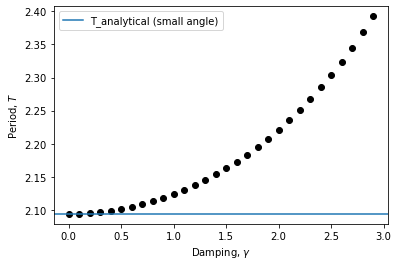

In [24]:
def DampedPendulumPeriodApp2():
    
    for γ in np.arange(0, 3, 0.1):
        # set up the model
        stepper = DampedPendulumStepper(γ=γ, x0=.01, dt=0.01, tmax=100)
    
        # iterate the model in time
        data = pd.DataFrame(stepper)
    
        # add the period to the plot
        T = FindPendulumPeriod(data)
        
        plt.plot(γ, T, 'ko')
        
    T_analytical = 2*np.pi / ω0
    plt.axhline(T_analytical, label='T_analytical (small angle)')
    plt.ylabel('Period, $T$')
    plt.xlabel('Damping, $\gamma$')
    plt.legend()
      
DampedPendulumPeriodApp2()

In [25]:
def DampedPendulumPhaseSpace(θ0=1):
    
    for γ in [0.5, 2, 4, 6]:
        stepper = DampedPendulumStepper(γ=γ, x0=θ0, dt=0.01, tmax=20)
        data = pd.DataFrame(stepper)
        
        plt.plot(data.x, data.v, label='γ={:.1f}'.format(γ))
        
    plt.xlabel('Displacement, θ')
    plt.ylabel('Velocity, dθ/dt')
    plt.legend()
      
interactive(DampedPendulumPhaseSpace, θ0=(0.1, 1, 0.1))

interactive(children=(FloatSlider(value=1.0, description='θ0', max=1.0, min=0.1), Output()), _dom_classes=('wi…

## Response to External Forces

In the damped pendulum, the motion decay from an initial perturbation until it comes to rest.

To keep the pendulum swinging, we need to provide a source of energy to drive the motion.

One way of modeling such a system is to drive it with an external force $F(t)$ in addition to the linear restoring force and linear damping force. The equation of motion for a simple harmonic oscillator be written as

\begin{align}
\frac{d^2 x}{dt^2} &= - \omega_0^2 x -\gamma \frac{d x}{dt}  + \frac{1}{m}F(t)\;.
\end{align}

The time dependence of F(t) is aribitrary. Because many forces in nature are periodic, we first consider the form

\begin{align}
\frac{1}{m}F(t) &= A_0 \cos(\omega t)\;,
\end{align}

where $\omega$ is the angular frequency of the driving force.

(For a pendulum, we would considering an external torque $\tau(t)$ instead of an external force.)

This driving force will pump energy into (or out of) the system.  The external forcing frequency, $\omega$, "competes" with the natural frequency of the oscillator, $\omega_0$.

### Numerical solution for a driven damped linear oscillator

We need to modify our stepper to include an external driving force of amplitude $A$ and frequency $\omega$.

### Exercise
> 1. Modify the code below so that it includes a driving force term in the equation of motion.

In [26]:
def DrivenDampedOscillatorStepper(x0=1, v0=0, γ=1, A=0, ω=0,
                                  dt=0.01, tmax=10):
    """
    Solve for motion of a driven damped oscillator using Euler-Richardson
    """
    
    # initialize the model
    t = 0
    x = x0
    v = v0
    
    while True:
        model = {'t': t, 'x': x, 'v': v}
        yield model # return the model state back to the caller
    
        if t > tmax:
            break
            
        # calculate acceleration (force / mass)
        a = - ω0**2 * x - γ * v + A * np.cos(ω*t)
        
        # use the Euler-Richardson algorithm to update the state of the model
        vmid = v + 1/2 * a * dt
        xmid = x + 1/2 * v * dt
        tmid = t + 1/2 * dt
        amid = - ω0**2 * xmid - γ * vmid + A * np.cos(ω*tmid)
        
        v = v + amid * dt
        x = x + vmid * dt
        t = t + dt

In [27]:
def DrivenDampedOscillatorPlotter(data):
    fig, axs = plt.subplots(1, 2, figsize=(8,4))
    
    axs[0].plot(data.t, data.x, label='x')
    axs[0].plot(data.t, data.v, label='v')
    axs[0].set_ylabel("x or v")
    axs[0].set_xlabel("t")
    axs[0].legend()
    
    axs[1].plot(data.x, data.v)
    axs[1].set_ylabel("v")
    axs[1].set_xlabel("x")

In [28]:
def DrivenDampedOscillatorApp(x0=1, v0=0, γ=0.5, ω=2, tmax=20):
    A = 1
    
    stepper = DrivenDampedOscillatorStepper(x0=x0, v0=v0,
                                            γ=γ, A=A, ω=ω,
                                           tmax=tmax)
    data = pd.DataFrame(stepper)
    DrivenDampedOscillatorPlotter(data)

In [29]:
interactive( DrivenDampedOscillatorApp, 
            x0=(-1, 1, 0.1), v0=(-3, 3, 0.1),
            γ=(0, 5, 0.2),
            ω=(1, 4, 0.1),
            tmax=(10, 100, 10))

interactive(children=(FloatSlider(value=1.0, description='x0', max=1.0, min=-1.0), FloatSlider(value=0.0, desc…

### Exercise
> 1. Explore the damped, driven pendulum for different forcing amplitudes and frequencies.
> 2. Investigate how the steady-state amplitude of driven, damped oscillator depends on
> the forcing frequency (while keeping $\gamma$ and $A$ unchanged)
> 3. What happens when the forcing frequency is near to the natural frequency $\omega_0 =3$?
> 4. Explore the effect of changing the damping parameter, $\gamma$.

##### Discussion: Resonance

- - -
### Textbook readings

- CSM 4.2 The Motion of a Pendulum
- CSM 4.3 Damped Harmonic Oscillator
- CSM 4.5 Response to External Forces

### Test 1

- Scheduled in class for Tuesday, October 8, 2:00-3:15 pm.  
- Dr Munroe will be physically present.
- Based on Lectures 1-8, Assignments 1-3, and Labs 1-3.